 ### Python scripts used for the paper entitled:
 #### Single character insertion-deletion model preserves long indels in ancestral sequence reconstruction

In [ ]:
## Python 3
# Dynamic of gap pattern at OMA files
# Created by:  Gholamhossein Jowkar <jowk@zhaw.ch>
# ACGT ZHAW
# Created date: Nov 2023
# Modified by: jowk
# Modified date: 

Importing the used libraries:

In [1]:
import os, sys, statistics
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

path = './mammals_data/' #path to the code directory and mammals data
os.chdir(path)

# Setting the styles for plots
sns.set_style('white')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context("paper", font_scale = 1)
sns.set_style('white')
color_1 = sns.color_palette()[0]
color_2 = sns.color_palette()[1]

## Dynamic of sequence length

Reading the gap lenght file

In [2]:
df_dynamic = pd.read_csv('./02_join_len_per_OMA_per_species_gappy.csv')
display(df_dynamic)

,OMA_group,seq_Mus,seq_Rattus,seq_Pan,seq_Homo,seq_Gorilla,seq_Macaca,seq_V2,seq_V5,seq_V7,...,tree_Rattus,tree_Pan,tree_Homo,tree_Gorilla,tree_Macaca,tree_V2,tree_V5,tree_V7,tree_V9,tree_root
0,1000134,876,876,876,876,876,875,876,876,876,...,0.00411,0.00431,0.00431,0.00421,0.03237,0.00401,0.00421,0.00411,0.00401,0
1,1000188,680,695,706,680,685,687,695,695,695,...,0.00949,0.00550,0.00550,0.05523,0.00392,0.00654,0.00540,0.00530,0.00382,0
2,1000194,1426,1426,1486,1486,1409,1465,1424,1486,1486,...,0.09782,0.07821,0.07968,0.34034,0.07561,0.06770,0.07602,0.07568,0.06769,0
3,1000293,171,171,172,172,175,172,171,172,172,...,0.07514,0.04196,0.04196,0.21601,0.03700,0.03332,0.04186,0.04176,0.03332,0
4,1000739,370,370,370,370,370,370,370,370,370,...,0.00599,0.00420,0.00420,0.01772,0.00400,0.00390,0.00410,0.00400,0.00390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,999727,227,221,226,224,248,226,221,216,216,...,0.13625,0.05973,0.09030,0.13635,0.05951,0.11590,0.05480,0.05470,0.05460,0
10765,999730,313,313,314,314,314,277,313,314,314,...,0.14952,0.02989,0.02669,0.04940,0.14952,0.10574,0.02348,0.02170,0.00913,0
10766,999882,831,821,826,826,818,804,821,826,826,...,0.14717,0.09735,0.09859,0.15217,0.09905,0.09578,0.09616,0.09378,0.09064,0
10767,999889,766,769,856,867,714,867,769,867,866,...,0.17275,0.19290,0.18005,0.19557,0.17538,0.14710,0.17691,0.17438,0.15214,0


### Spearman Correlation Coefficients

In [1]:
dict_spearman_coef = {}

for i in range(len(df_dynamic)):
    y = df_dynamic.iloc[i, 1:12] #y values are the sequence lengths
    x = df_dynamic.iloc[i, 12:] #x values are the corresponding distances from the root
    
    dict_spearman_coef[df_dynamic.iloc[i,0]] = spearmanr(x, y)
    
df_spearman_coef = pd.DataFrame.from_dict(dict_spearman_coef, orient='index')
df_spearman_coef.columns = ['coef', 'p-val']
df_spearman_coef.to_csv("./02_df_spearman_coef_gappy_w_p_value.csv")

print("Done")

Done


### Report: Percentage of significant samples from Spearman correlation coefficient

In [74]:
#percentage of significant
print("Total number of gappy samples:",len(df_spearman_coef))
print("********************************************************")

df_significant_spearman = df_spearman_coef[df_spearman_coef['p-val']<= 0.05]
spearman_significant_data_prc = (len(df_significant_spearman)/ len(df_spearman_coef))
print("Percentage of samples with significant Spearman correlation coefficient: {:.2%}".format(spearman_significant_data_prc))

print("Count of samples with significant Spearman correlation coefficient:",len(df_significant_spearman))

df_significant_spearman_positive = df_spearman_coef[(df_spearman_coef['p-val']<= 0.05) & (df_spearman_coef['coef']>=0)]
print("Count of samples with significant Spearman correlation coefficient and posivite coefficient:",len(df_significant_spearman_positive))

df_significant_spearman_negative = df_spearman_coef[(df_spearman_coef['p-val']<= 0.05) & (df_spearman_coef['coef']<0)]
print("Count of samples with significant Spearman correlation coefficient and negative coefficient:",len(df_significant_spearman_negative))
print("********************************************************")


Total number of gappy samples: 10769
********************************************************
Percentage of samples with significant Spearman correlation coefficient: 12.04%
Count of samples with significant Spearman correlation coefficient: 1297
Count of samples with significant Spearman correlation coefficient and posivite coefficient: 459
Count of samples with significant Spearman correlation coefficient and negative coefficient: 838
********************************************************


### Plot: the Spearman correlation coefficient distribution with significant level

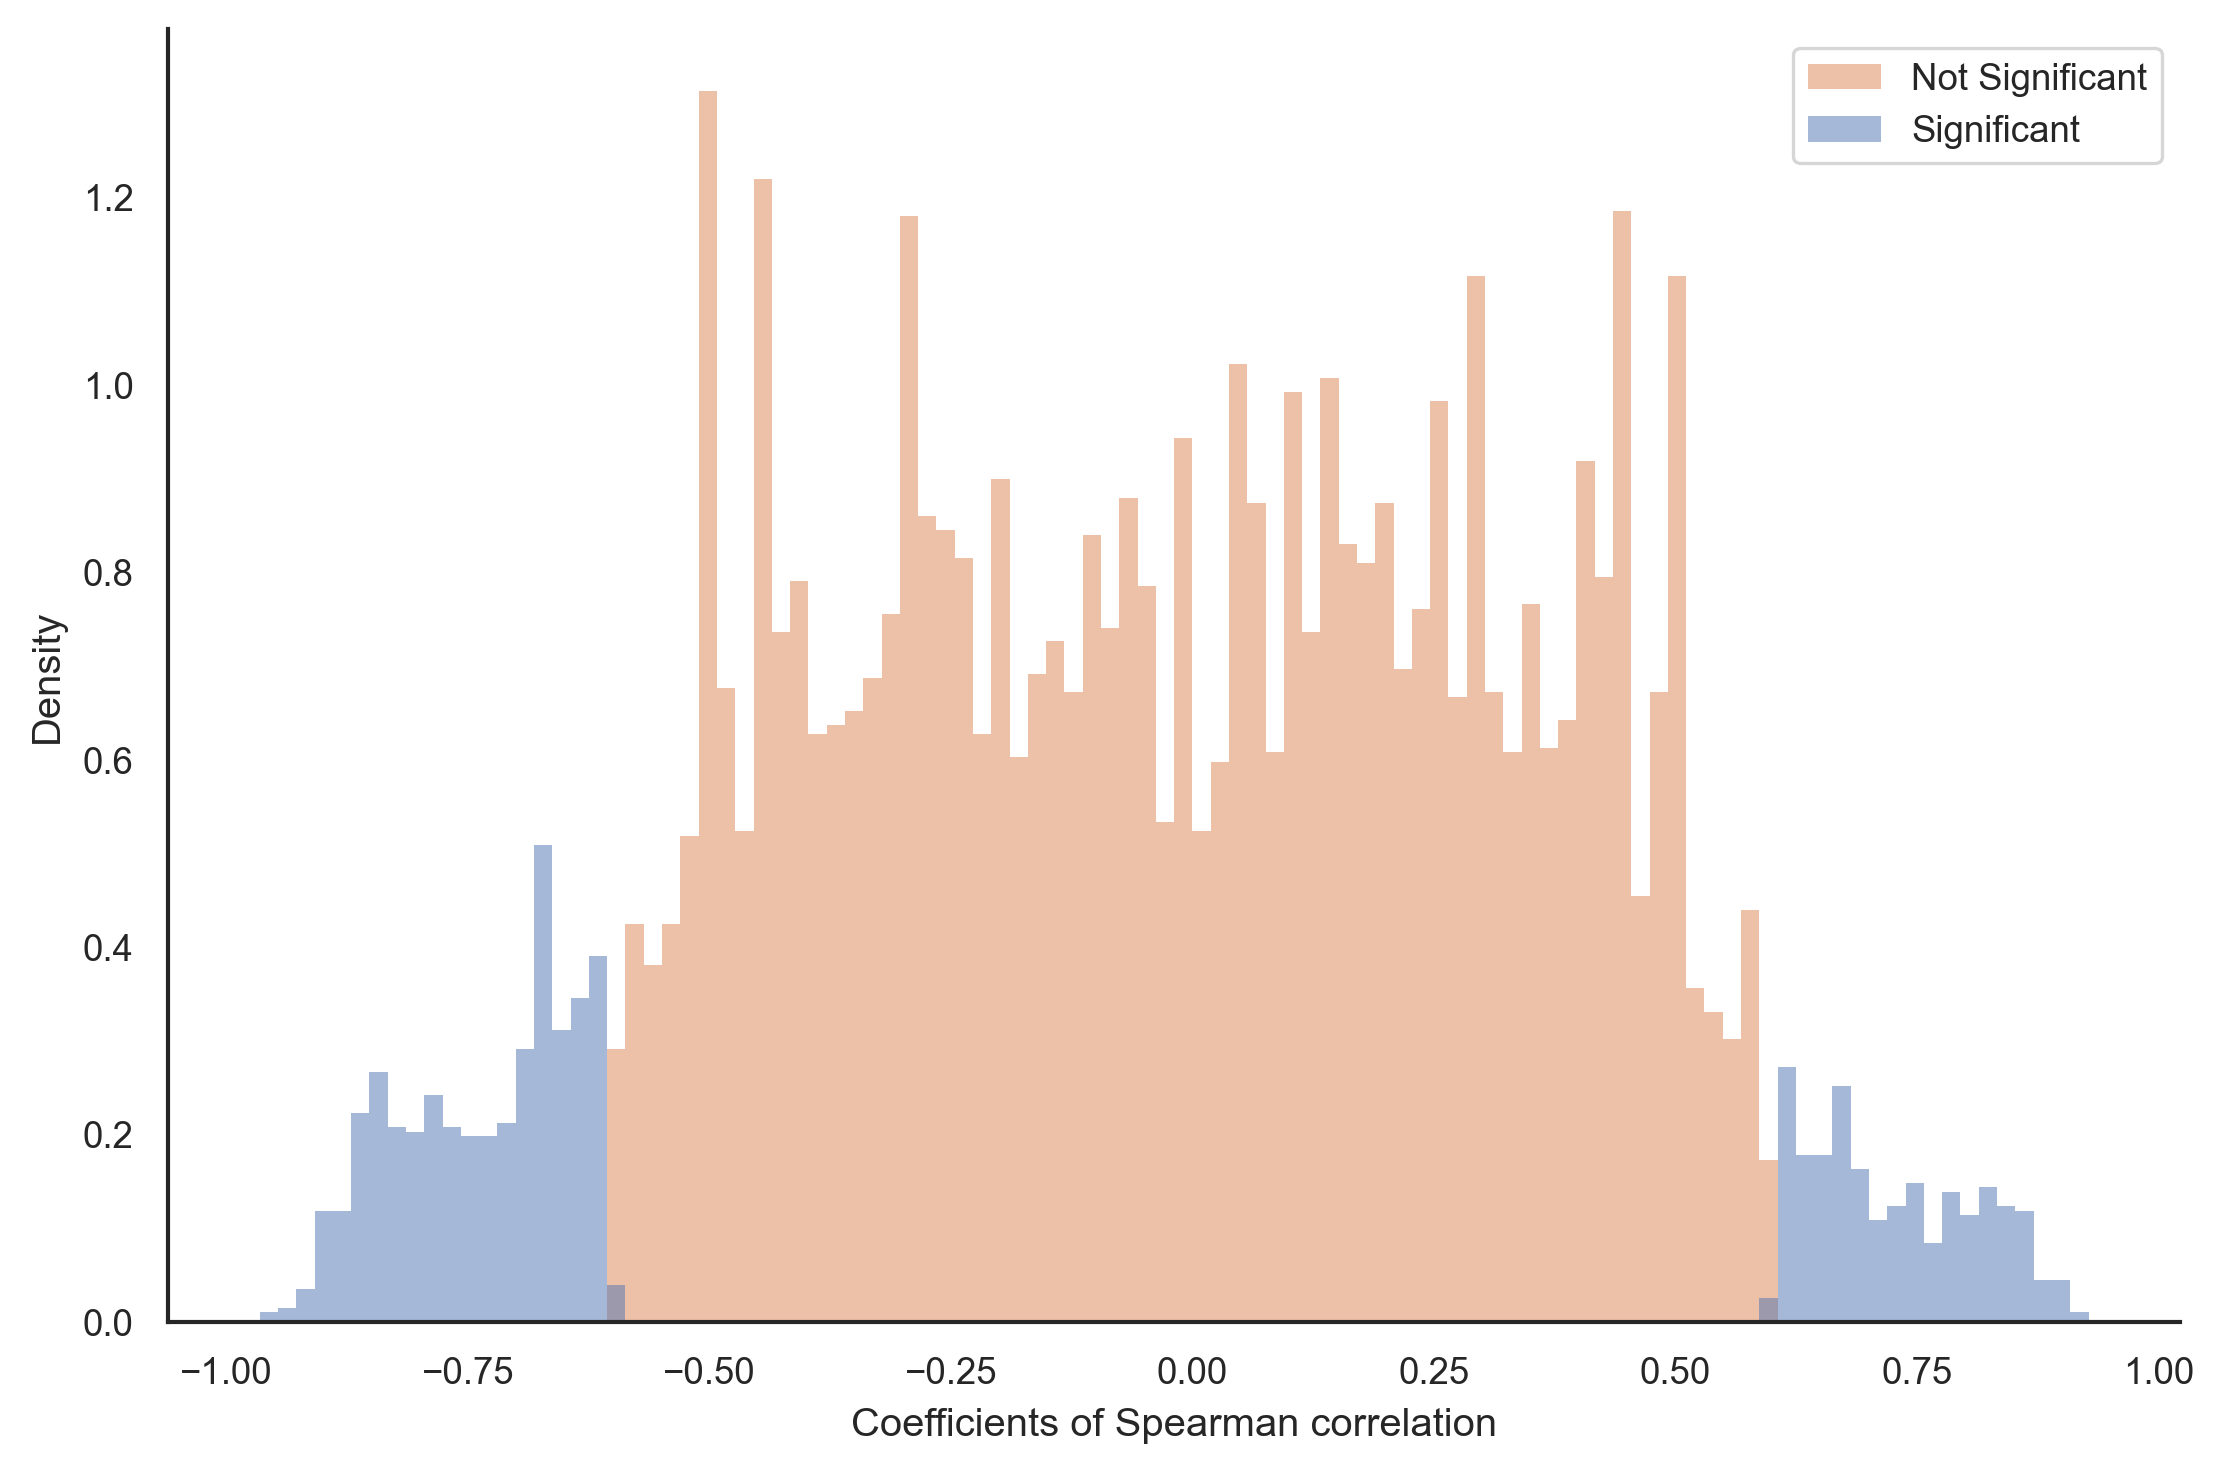

In [13]:
# df_spearman_coef.columns = ['coef','p-val']
df_spearman_coef = pd.read_csv("./02_df_spearman_coef_gappy_w_p_value.csv")
# Set the significant level
df_spearman_coef['Significant level'] = pd.cut(df_spearman_coef['p-val'], [0, 0.05, 1], labels=["Significant", "Not significant"])
#df_spearman_coef

ax = sns.displot(df_spearman_coef, x='coef', hue='Significant level',  #shrink=.8 ,
    bins=100, linewidth=0, kde=False, stat="density",  aspect=1.5,  legend=False)
ax.set(ylabel='Density', xlabel='Coefficients of Spearman correlation') #title='Distribution of the Spearman Correlation Coefficients on Mammalian Data'

plt.legend(title='', loc='upper right', labels=[ 'Not Significant', 'Significant'])
plt.show(ax)

---

## Dynamic of sequence lengths

#### Plot empirical gap length distribution: Tips vs. Root

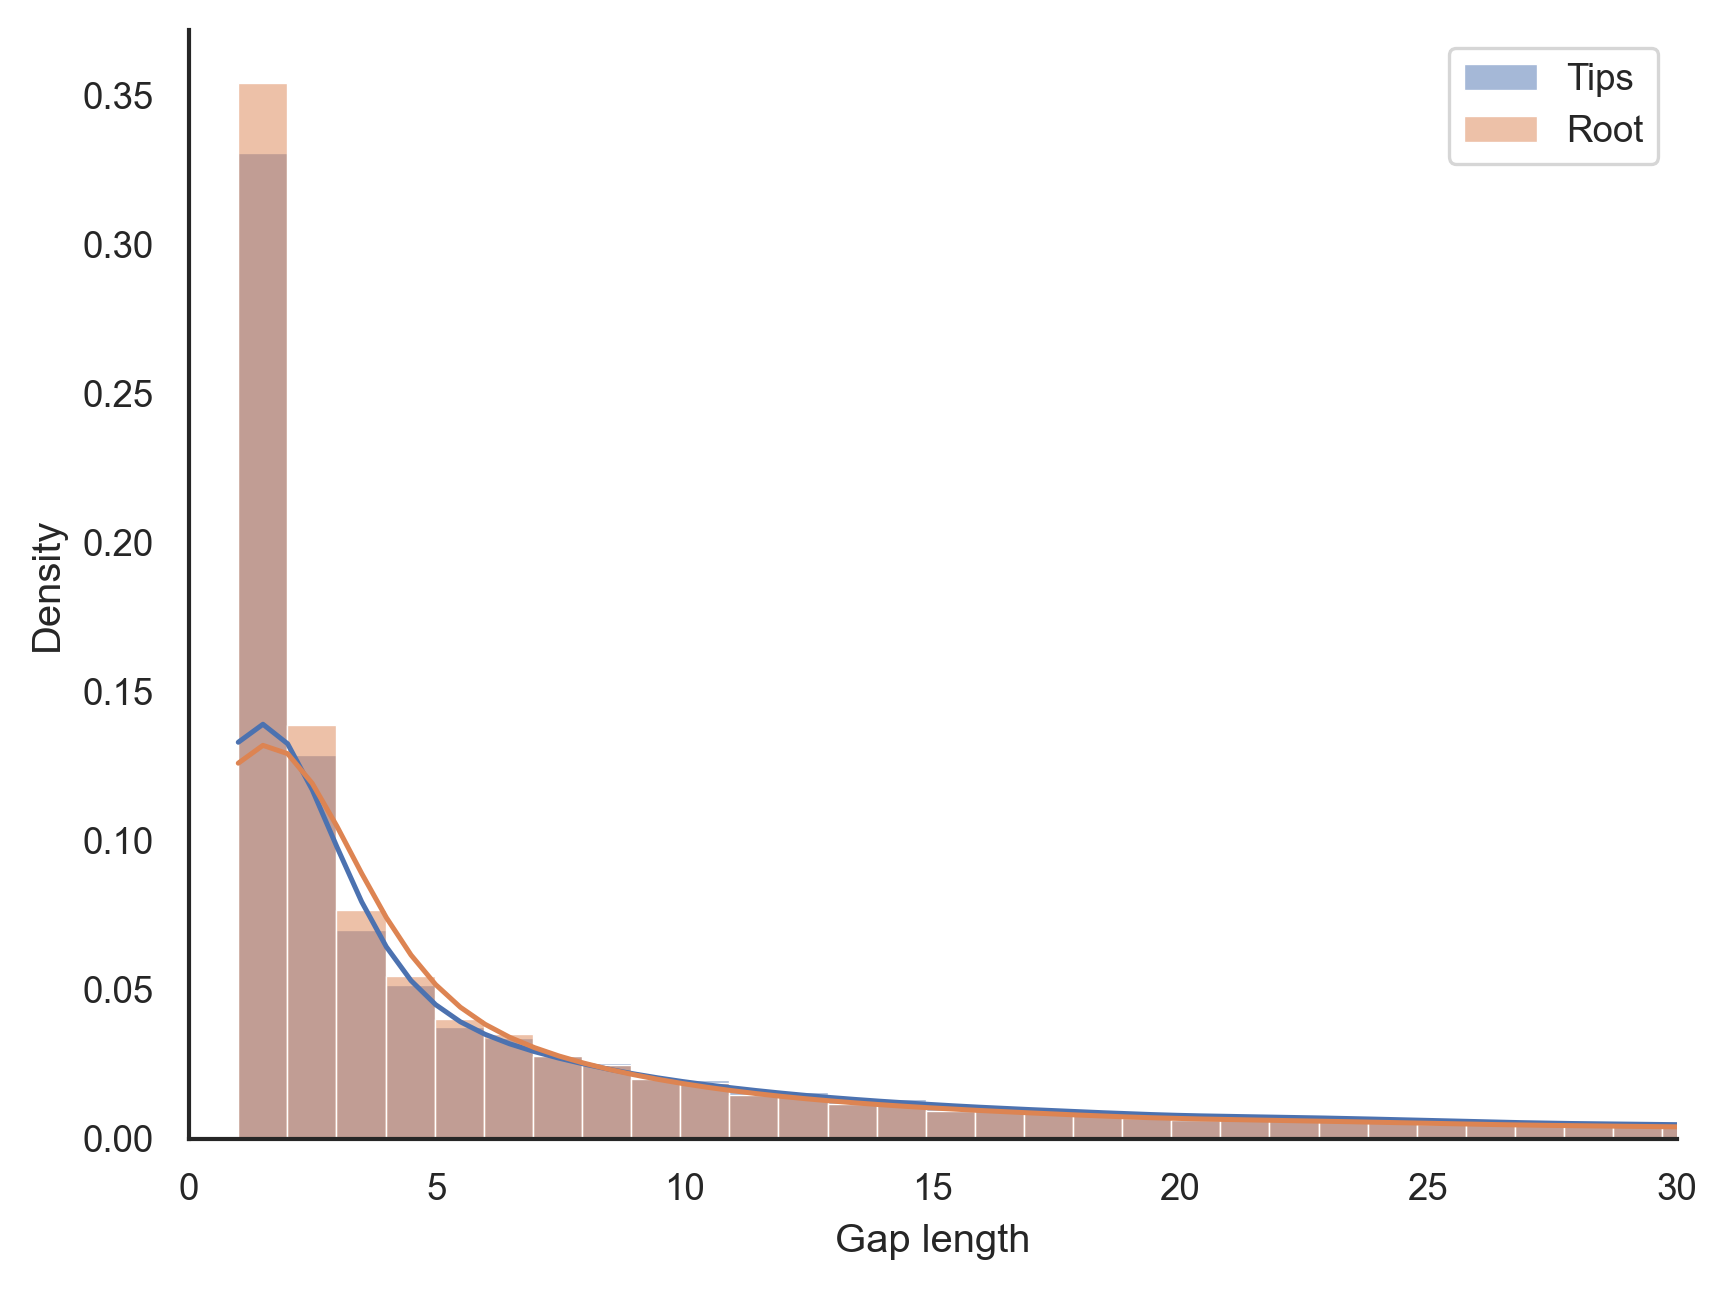

In [4]:
# Reading the dataframe
df_taxa_gap_len = pd.read_json('./02_json_taxa_gap_length.json')
df_root_gap_len = pd.read_json('./02_json_root_gap_length.json')

# df_taxa_gap_len.head()

threshold=100
filtered_df_taxa = df_taxa_gap_len[df_taxa_gap_len['Gap length'] <= threshold]
filtered_df_root = df_root_gap_len[df_root_gap_len['Gap length'] <= threshold]

fig = sns.histplot( data=filtered_df_taxa, x='Gap length', bins=100, kde=True, stat='density',alpha=0.5, color=color_1, label="Tips" , edgecolor = None)
fig = sns.histplot( data=filtered_df_root, x='Gap length', bins=100, kde=True, stat='density',alpha=0.5, color=color_2, label="Root" , edgecolor = None)

# fig.set_axis_off()
# fig.set_frame_on(False)

fig.set_xlim(0, 30)
fig.set(ylabel='Density', xlabel='Gap length')#, title='Plot of the Emperical Gap Length Distributions on Mammalian Data: Tips vs. Root')
sns.despine()
plt.legend() 
plt.show()

#### Compare the two distributions: K-L divergence

In [6]:
from scipy.special import rel_entr, kl_div

hist1, bin_edges = np.histogram(filtered_df_taxa['Gap length'], bins=100, density=False)
p = hist1 / hist1.sum()
# print(hist1)
# print(bin_edges)
# print("The p vector is:", p)

hist2, bin_edges = np.histogram(filtered_df_root['Gap length'], bins=100, density=False)
q = hist2/ hist2.sum()
# print(hist2)
# print(bin_edges)
# print("The q vetor is:", q)
 
print('KL-divergence(p || q): %.3f ' % sum(kl_div(p,q)))
print('KL-divergence(q || p): %.3f ' % sum(kl_div(q,p)))
print('KL-divergence(p || p): %.3f ' % sum(kl_div(p,p)))
print('KL-divergence(q || q): %.3f ' % sum(kl_div(q,q)))

KL-divergence(p || q): 0.008 
KL-divergence(q || p): 0.007 
KL-divergence(p || p): 0.000 
KL-divergence(q || q): 0.000 


#### Plot the difference between the average gap length of the tips and the root

Read and compute the difference

In [6]:
mean_df = pd.read_csv('./02_df_gap_length_taxa_root.csv')
mean_df.head()
distance_df = mean_df['taxa']-mean_df['root']
distance_df = pd.DataFrame({'Difference': distance_df})

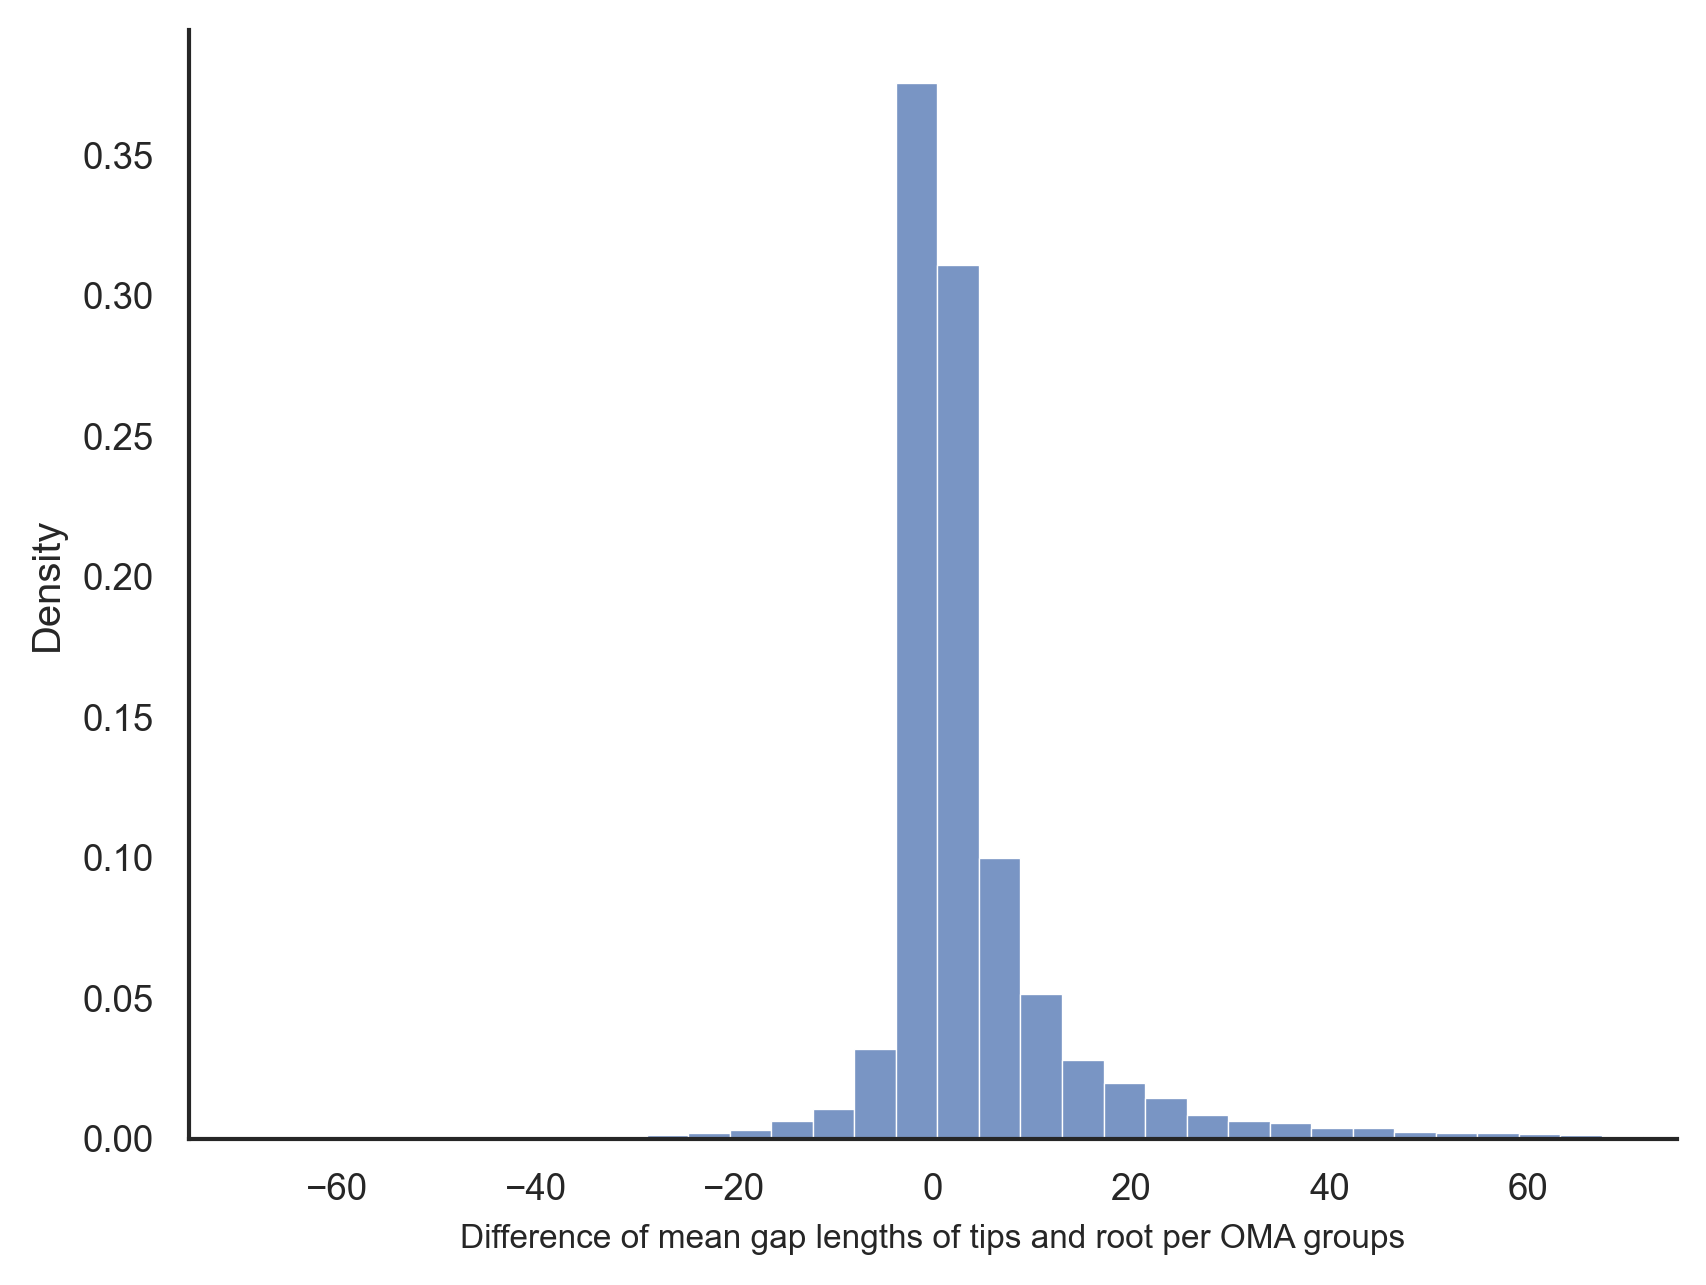

In [7]:
# The empirical distribution of the paired differences between the tips and the root

# sns.set_style('darkgrid')
fig = sns.histplot( data = distance_df, x='Difference', bins=100, kde=0, color=color_1, stat='probability', label="Distance")
fig.set(ylabel='Density', xlabel='Difference of mean gap lengths of tips and root per OMA groups')#, title='The Empirical Distribution of the Paired Differences between Tips and Root on Mammalian Data')
fig.set_xlabel("Difference of mean gap lengths of tips and root per OMA groups", fontsize=8)
fig.set_xlim(-75,75)
sns.despine()
# plt.legend() 
plt.show()

#### The average over all the differences.

In [8]:
distance_df.mean()

Difference    4.130364
dtype: float64

---
# Revised version

In [6]:
df_dynamic_sub = pd.read_csv('./02_sub_join_b_seq_len_per_OMA_per_species_gappy.csv')
display(df_dynamic_sub)

,OMA_group,seq_Mus,seq_Rattus,seq_Pan,seq_Homo,seq_Macaca,seq_Gorilla,seq_V2,seq_V5,seq_V7,...,tree_Pan,tree_Homo,tree_Macaca,tree_Gorilla,tree_V2,tree_V5,tree_V7,tree_V9,tree_root,is_gappy
0,1003384,639,630,617,630,639,630,639,630,630,...,0.00165,0.00010,0.00010,0.00165,0.00415,0.00010,0.00010,0.00415,0,1
1,1004670,276,277,293,293,293,279,277,293,293,...,0.00368,0.00010,0.01695,0.21093,0.03782,0.01283,0.00010,0.03782,0,1
2,1007052,577,566,573,573,499,573,574,573,573,...,0.00010,0.00216,0.13278,0.00216,0.01079,0.00010,0.00579,0.01104,0,1
3,1008423,536,536,514,514,491,513,536,514,514,...,0.00216,0.00010,0.15494,0.13495,0.00995,0.00010,0.00810,0.00994,0,1
4,1008646,621,621,671,675,676,616,621,675,679,...,0.00185,0.00185,0.01576,0.15227,0.05505,0.00077,0.01402,0.05505,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,999710,1373,1368,1408,1406,1402,1408,1372,1406,1404,...,0.00500,0.00593,0.02786,0.00980,0.09313,0.00203,0.01717,0.12300,0,1
3664,999718,461,449,447,450,450,447,456,447,447,...,0.00915,0.00227,0.02310,0.00687,0.07852,0.00229,0.01761,0.07142,0,1
3665,999719,454,452,455,455,455,455,454,455,455,...,0.00223,0.00010,0.01535,0.00449,0.04108,0.00222,0.00270,0.06810,0,1
3666,999730,313,313,314,314,277,314,313,314,314,...,0.00641,0.00321,0.14039,0.02770,0.10574,0.00178,0.01257,0.00913,0,1


In [7]:
df_dynamic_sub.iloc[1,1:12]
# df_dynamic_sub.iloc[1,12:-1]

seq_Mus        276.0
seq_Rattus     277.0
seq_Pan        293.0
seq_Homo       293.0
seq_Macaca     293.0
seq_Gorilla    279.0
seq_V2         277.0
seq_V5         293.0
seq_V7         293.0
seq_V9         293.0
seq_root       275.0
Name: 1, dtype: float64

In [8]:
dict_spearman_coef = {}

for i in range(len(df_dynamic_sub)):
    y = df_dynamic_sub.iloc[i, 1:12] #y values are the sequence lengths
    x = df_dynamic_sub.iloc[i, 12:-1] #x values are the corresponding branches
    
    dict_spearman_coef[df_dynamic_sub.iloc[i,0]] = spearmanr(x, y)
    
df_spearman_coef = pd.DataFrame.from_dict(dict_spearman_coef, orient='index')
df_spearman_coef.columns = ['coef', 'p-val']
df_spearman_coef.to_csv("./02_sub_df_spearman_coef_gappy_w_p_value.csv")

print("Done")

C:\Users\jowkar\.conda\envs\env01\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Done


In [9]:
df_spearman_coef

,coef,p-val
1003384,-0.072354,0.832570
1004670,-0.009986,0.976753
1007052,-0.232703,0.491082
1008423,0.033037,0.923181
1008646,0.071595,0.834304
...,...,...
999710,-0.489714,0.126267
999718,0.392678,0.232242
999719,-0.298481,0.372630
999730,-0.799503,0.003143


In [10]:
#percentage of significant
print("Total number of gappy samples:",len(df_spearman_coef))
print("********************************************************")

df_significant_spearman = df_spearman_coef[df_spearman_coef['p-val']<= 0.05]
spearman_significant_data_prc = (len(df_significant_spearman)/ len(df_spearman_coef))
print("Percentage of samples with significant Spearman correlation coefficient: {:.2%}".format(spearman_significant_data_prc))

print("Count of samples with significant Spearman correlation coefficient:",len(df_significant_spearman))

df_significant_spearman_positive = df_spearman_coef[(df_spearman_coef['p-val']<= 0.05) & (df_spearman_coef['coef']>=0)]
print("Count of samples with significant Spearman correlation coefficient and posivite coefficient:",len(df_significant_spearman_positive))

df_significant_spearman_negative = df_spearman_coef[(df_spearman_coef['p-val']<= 0.05) & (df_spearman_coef['coef']<0)]
print("Count of samples with significant Spearman correlation coefficient and negative coefficient:",len(df_significant_spearman_negative))
print("********************************************************")


Total number of gappy samples: 3668
********************************************************
Percentage of samples with significant Spearman correlation coefficient: 3.46%
Count of samples with significant Spearman correlation coefficient: 127
Count of samples with significant Spearman correlation coefficient and posivite coefficient: 59
Count of samples with significant Spearman correlation coefficient and negative coefficient: 68
********************************************************


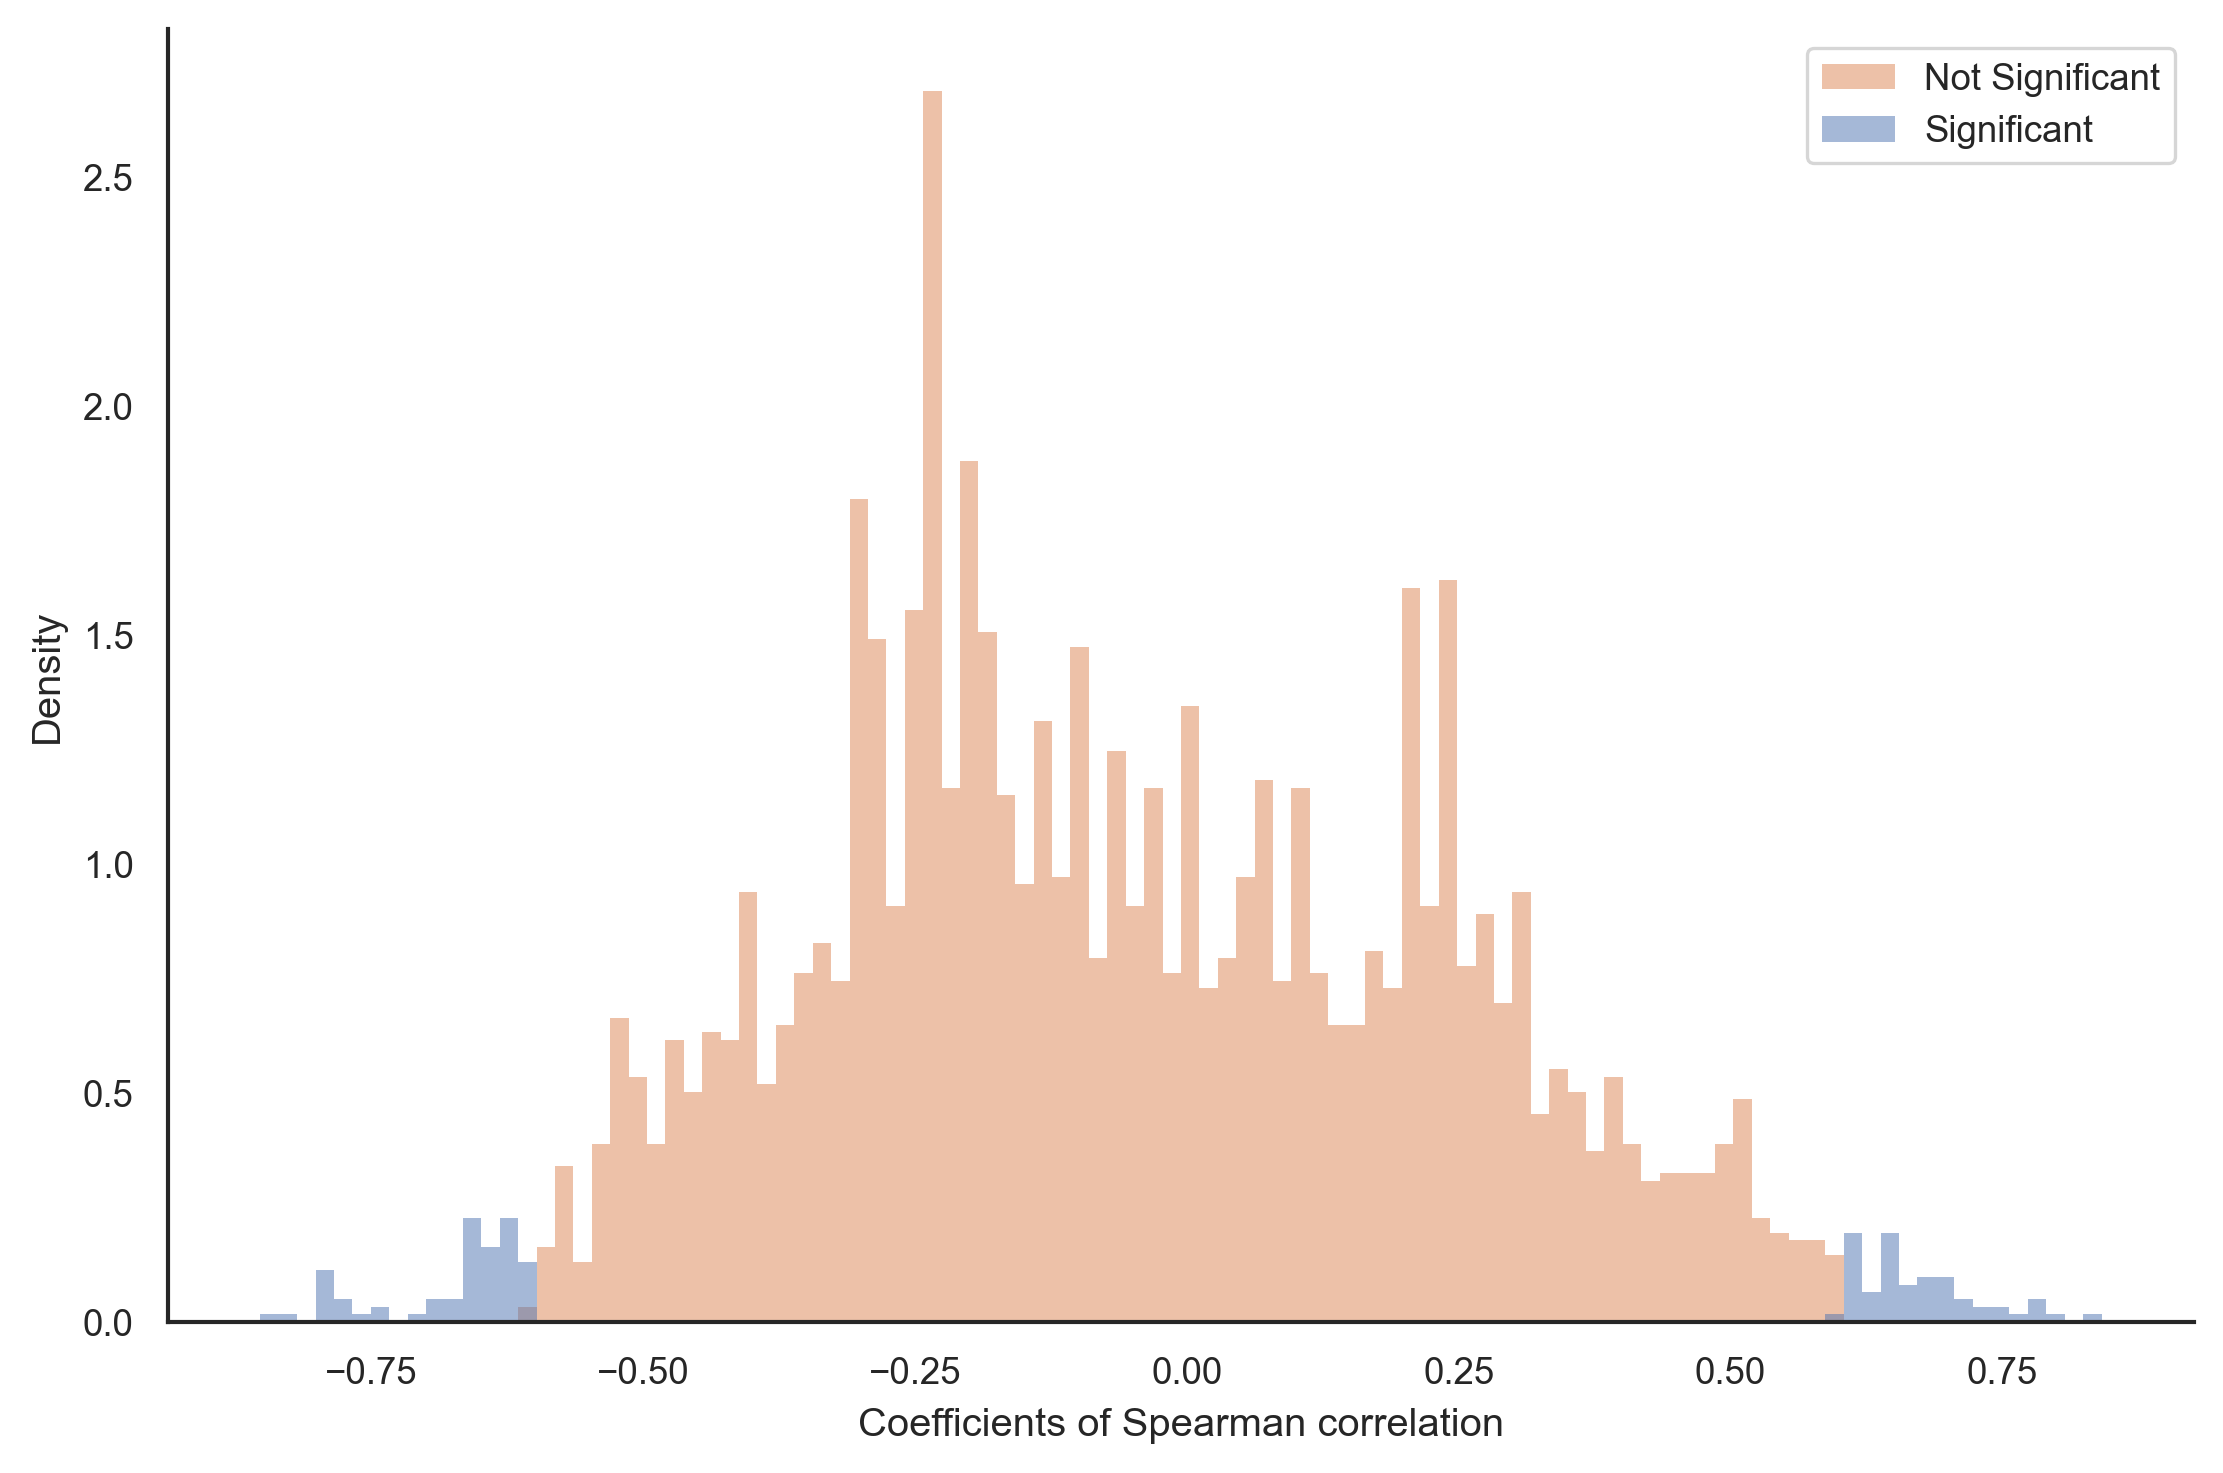

In [11]:
df_spearman_coef = pd.read_csv("./02_sub_df_spearman_coef_gappy_w_p_value.csv")
# Set the significant level
df_spearman_coef['Significant level'] = pd.cut(df_spearman_coef['p-val'], [0, 0.05, 1], labels=["Significant", "Not significant"])
#df_spearman_coef

ax = sns.displot(df_spearman_coef, x='coef', hue='Significant level',  #shrink=.8 ,
    bins=100, linewidth=0, kde=False, stat="density",  aspect=1.5,  legend=False)
ax.set(ylabel='Density', xlabel='Coefficients of Spearman correlation') #title='Distribution of the Spearman Correlation Coefficients on Mammalian Data'

plt.legend(title='', loc='upper right', labels=[ 'Not Significant', 'Significant'])
plt.show(ax)

## Dynamic of sequence lengths

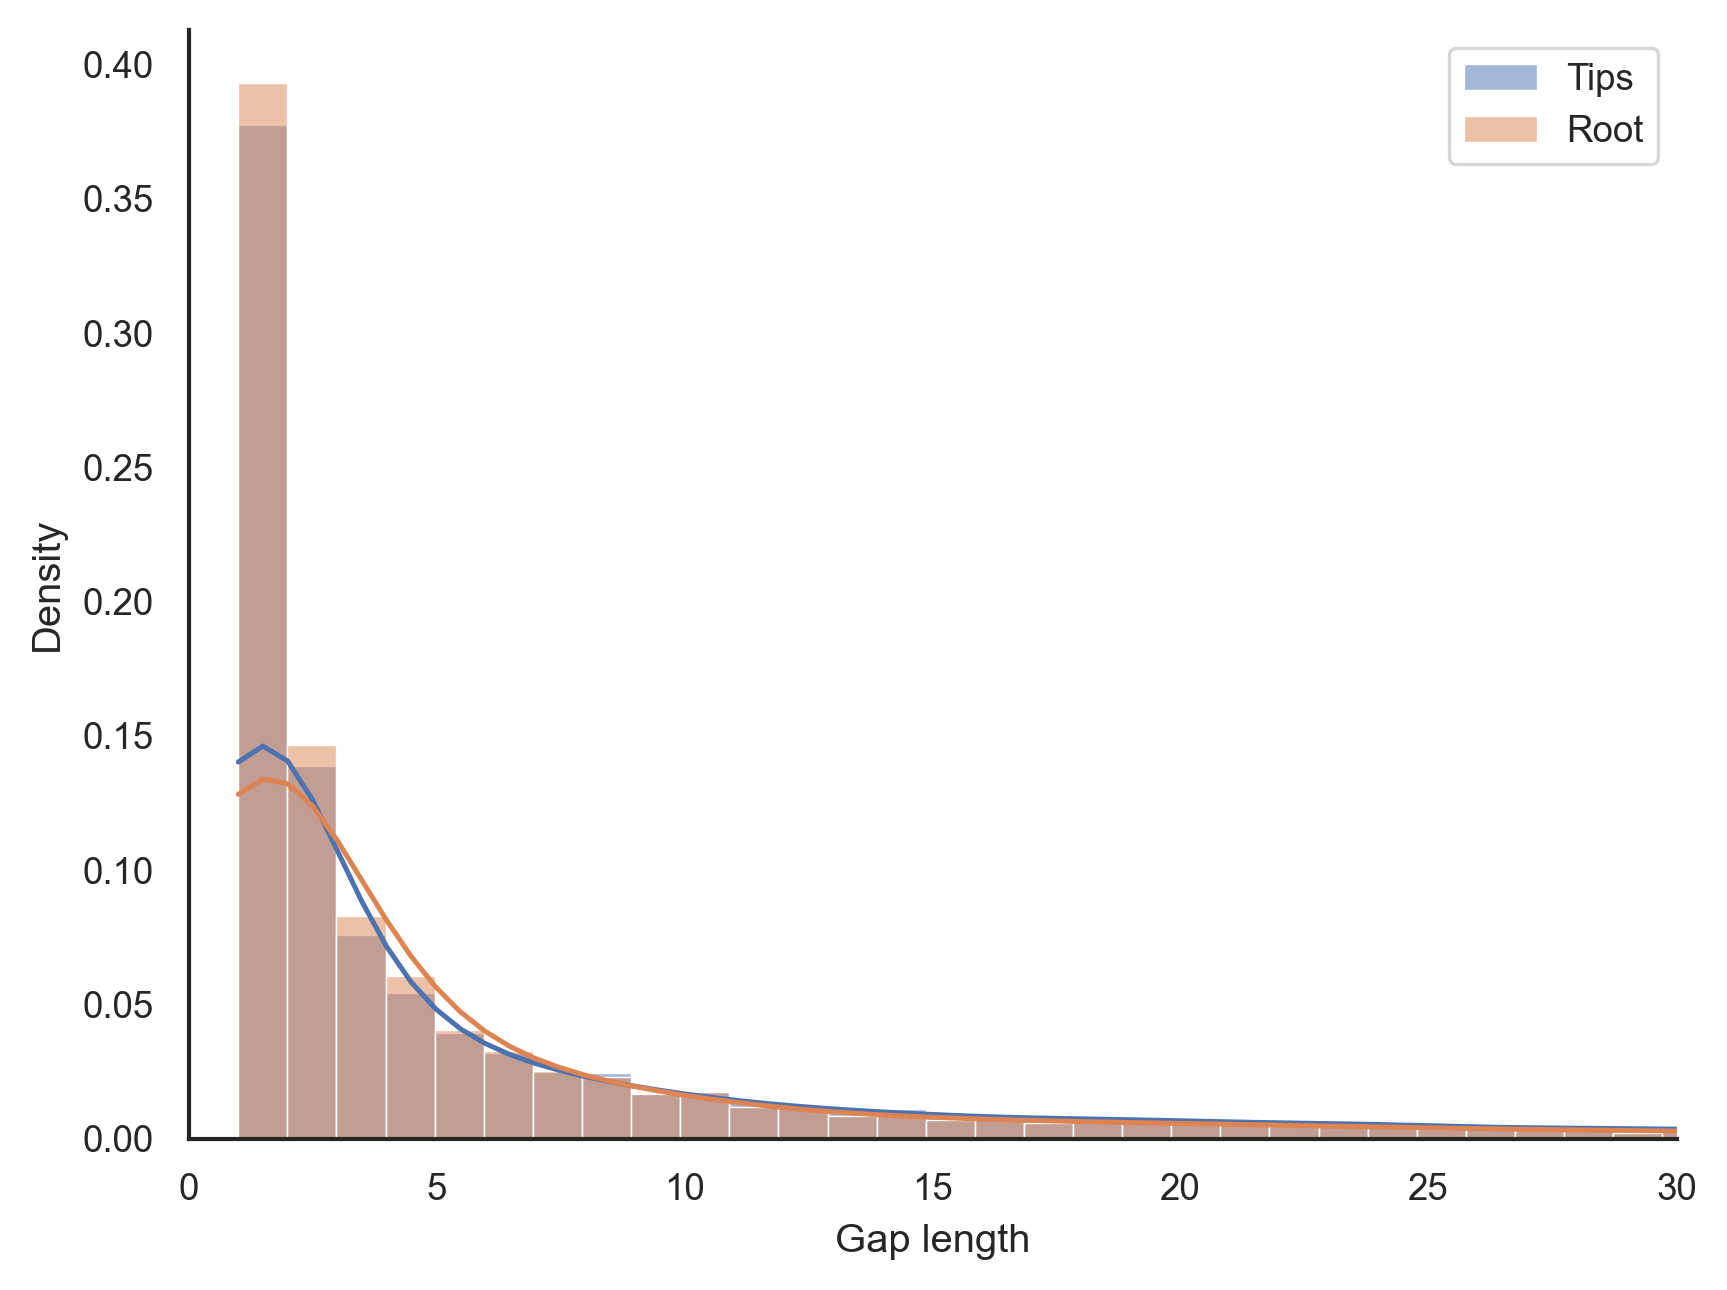

In [13]:
# Reading the dataframe
df_taxa_gap_len = pd.read_json('./02_sub_json_taxa_gap_length.json')
df_root_gap_len = pd.read_json('./02_sub_json_root_gap_length.json')

# df_taxa_gap_len.head()

threshold=100
filtered_df_taxa = df_taxa_gap_len[df_taxa_gap_len['Gap length'] <= threshold]
filtered_df_root = df_root_gap_len[df_root_gap_len['Gap length'] <= threshold]

fig = sns.histplot( data=filtered_df_taxa, x='Gap length', bins=100, kde=True, stat='density',alpha=0.5, color=color_1, label="Tips" , edgecolor = None)
fig = sns.histplot( data=filtered_df_root, x='Gap length', bins=100, kde=True, stat='density',alpha=0.5, color=color_2, label="Root" , edgecolor = None)

# fig.set_axis_off()
# fig.set_frame_on(False)

fig.set_xlim(0, 30)
fig.set(ylabel='Density', xlabel='Gap length')#, title='Plot of the Emperical Gap Length Distributions on Mammalian Data: Tips vs. Root')
sns.despine()
plt.legend() 
plt.show()

## Kolmogorov-Smirnov test instead of KL divergence

In [14]:
from scipy.stats import ks_2samp

# Run Kolmogorov-Smirnov test
print(ks_2samp(list(filtered_df_root['Gap length']), list(filtered_df_taxa['Gap length'])))

KstestResult(statistic=0.03869746257640361, pvalue=1.5762140409536683e-16)


In [15]:
from scipy.special import rel_entr, kl_div

hist1, bin_edges = np.histogram(filtered_df_taxa['Gap length'], bins=100, density=False)
p = hist1 / hist1.sum()
# print(hist1)
# print(bin_edges)
# print("The p vector is:", p)

hist2, bin_edges = np.histogram(filtered_df_root['Gap length'], bins=100, density=False)
q = hist2/ hist2.sum()
# print(hist2)
# print(bin_edges)
# print("The q vetor is:", q)
 
print('KL-divergence(p || q): %.3f ' % sum(kl_div(p,q)))
print('KL-divergence(q || p): %.3f ' % sum(kl_div(q,p)))
print('KL-divergence(p || p): %.3f ' % sum(kl_div(p,p)))
print('KL-divergence(q || q): %.3f ' % sum(kl_div(q,q)))

KL-divergence(p || q): 0.007 
KL-divergence(q || p): 0.006 
KL-divergence(p || p): 0.000 
KL-divergence(q || q): 0.000 


In [ ]:
#### Plot the difference between the average gap length of the tips and the root

In [2]:
mean_df = pd.read_csv('./02_sub_df_gap_length_taxa_root.csv')
mean_df.head()
distance_df = mean_df['taxa']-mean_df['root']
distance_df = pd.DataFrame({'Difference': distance_df})

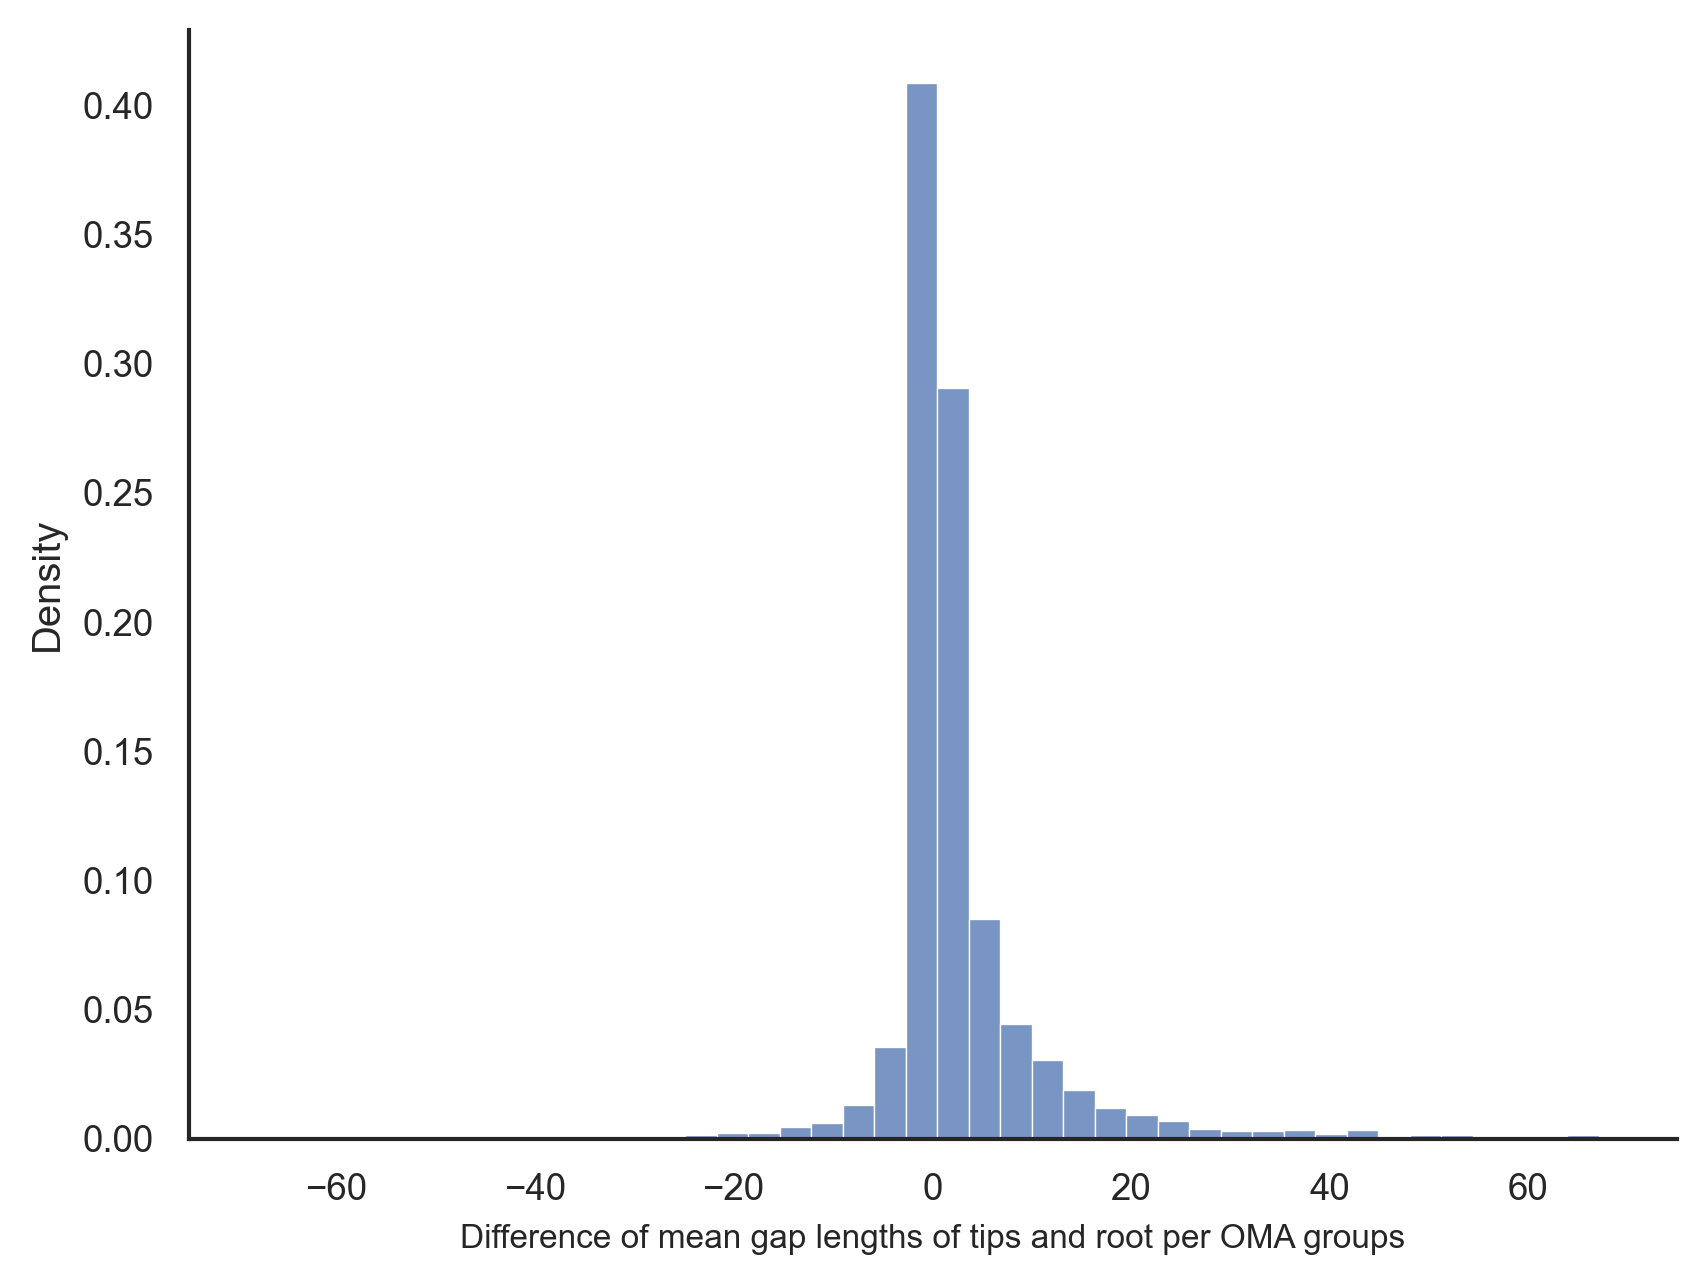

In [3]:
# The empirical distribution of the paired differences between the tips and the root

# sns.set_style('darkgrid')
fig = sns.histplot( data = distance_df, x='Difference', bins=100, kde=0, color=color_1, stat='probability', label="Distance")
fig.set(ylabel='Density', xlabel='Difference of mean gap lengths of tips and root per OMA groups')#, title='The Empirical Distribution of the Paired Differences between Tips and Root on Mammalian Data')
fig.set_xlabel("Difference of mean gap lengths of tips and root per OMA groups", fontsize=8)
fig.set_xlim(-75,75)
sns.despine()
# plt.legend() 
plt.show()

In [4]:
distance_df.mean()

Difference    3.105561
dtype: float64